In [ ]:
# Credit Kaggle Dataset and Code
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [ ]:
import os
import time
import shutil
import pathlib
import itertools
from PIL import Image
import random

# import data handling tools
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
# import Deep learning Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

print ('modules loaded')

modules loaded


In [ ]:
# Define the directories
test_dir = '/drive/MyDrive/Hackathon_by_the_sea/Fire'        # Replace with your test directory


In [ ]:
# Function to display one random sample from each class
def display_random_sample(dataset_dir):
    classes = os.listdir(dataset_dir)  # List of class directories
    plt.figure(figsize=(15, 10))  # Adjust the figure size if needed

    for i, class_name in enumerate(classes):
        class_dir = os.path.join(dataset_dir, class_name)
        image_files = os.listdir(class_dir)  # Get all images in the class folder
        random_image = random.choice(image_files)  # Select a random image
        img_path = os.path.join(class_dir, random_image)

        # Load the image with its original size
        img = load_img(img_path)

        # Display the image
        plt.subplot(1, len(classes), i + 1)  # Display images in a single row
        plt.imshow(img)
        plt.axis('off')  # Turn off axis for better visualization
        plt.title(f"{class_name} ({img.size[0]}x{img.size[1]})")  # Show class name and image size

    plt.show()


Training set samples:


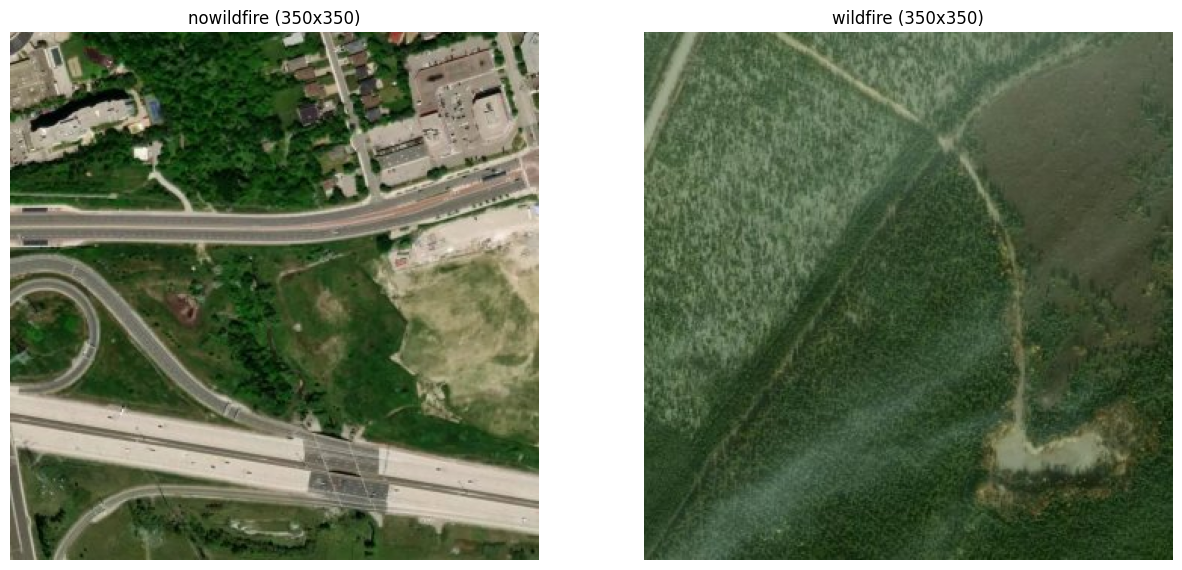

In [ ]:
# Display one random sample from train, validation, and test sets
print("Training set samples:")
display_random_sample(test_dir)



In [ ]:
dir = '/drive/MyDrive/Hackathon_by_the_sea/Fire'
x_train = []
y_train = []
for direct in os.listdir(dir):
    print("Loading dataset training {}".format(direct))
    for filename in os.listdir(os.path.join(dir,direct)):
        img_path = os.path.join(dir,direct,filename)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (32,32))
        img = np.array(img)
        img = img/255
        x_train.append(img)
        y_train.append(direct)

Loading dataset training wildfire
Loading dataset training nowildfire


In [ ]:
dir_val = '/drive/MyDrive/Hackathon_by_the_sea/Fire'
x_test=[]
y_test=[]
for direct in os.listdir(dir_val):
    print("Loading dataset validation {}".format(direct))
    for filename in os.listdir(os.path.join(dir_val,direct)):
        img_path = os.path.join(dir_val,direct,filename)
        image = cv2.imread(img_path)
        image = cv2.resize(image,(32,32))
        image = np.array(image)
        image = image/255
        x_test.append(image)
        y_test.append(direct)

In [ ]:
x_train = np.array(x_train)
x_test = np.array(x_test)

In [ ]:
y_train[30000]

In [ ]:
# Replace "wildfire" with 1 and "nowildfire" with 0
y_train = [1 if label == 'wildfire' else 0 for label in y_train]
y_val = [1 if label == 'wildfire' else 0 for label in y_val]
y_test = [1 if label == 'wildfire' else 0 for label in y_test]

In [ ]:
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)


In [ ]:
len(x_train[4][4])

In [ ]:
# Now check the shape of your datasets
print("x_train shape:", x_train.shape)  # Should be (num_samples, height, width, num_channels)
print("x_valid shape:", x_val.shape)
print("x_test shape:", x_test.shape)

print("y_train shape:", y_train.shape)
print("y_valid shape:", y_val.shape)
print("y_test shape:", y_test.shape)

In [ ]:
# Step 1: Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(256, (3, 3), activation='relu', padding='same'),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same'),

    Flatten(),

    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    BatchNormalization(),

    Dense(1, activation='sigmoid')  # Output layer with number of classes
])

# Step 2: Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Loss function for multi-class classification
              metrics=['accuracy'])

model.summary()

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Step 3: Train the model
history = model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=20,
    batch_size=64,
    callbacks=[EarlyStopping(monitor='val_loss', patience=4)]
)


In [ ]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print(f'Test Accuracy: {test_accuracy:.4f}')

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

In [ ]:

# Predict on the datasets
y_train_pred = model.predict(x_train)
y_val_pred = model.predict(x_val)
y_test_pred = model.predict(x_test)

# Convert probabilities to binary classes if using a classification model
y_train_pred_classes = (y_train_pred > 0.5).astype("int32")
y_val_pred_classes = (y_val_pred > 0.5).astype("int32")
y_test_pred_classes = (y_test_pred > 0.5).astype("int32")



In [ ]:
print("Confusion matrix for train: \n")
cm = confusion_matrix(y_train, y_train_pred_classes)
sns.heatmap(cm, annot=True)
plt.title(f"Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [ ]:
from sklearn.metrics import  classification_report

print(f"classification report for train : \n{classification_report(y_train, y_train_pred_classes)}")

In [ ]:
print("Confusion matrix for valid: \n")
cm = confusion_matrix(y_val, y_val_pred_classes)
sns.heatmap(cm, annot=True)
plt.title(f"Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [ ]:
print(f"classification report for valid : \n{classification_report(y_val, y_val_pred_classes)}")

In [ ]:
print("Confusion matrix for test: \n")
cm = confusion_matrix(y_test, y_test_pred_classes)
sns.heatmap(cm, annot=True)
plt.title(f"Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [ ]:
print(f"classification report for test : \n{classification_report(y_test, y_test_pred_classes)}")